In [ ]:
destination_folder = "/content/PaHaWspiral"  # Replace with the path to your new folder

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.7 MB/s eta 0:00:00


In [ ]:
import shutil

folder_path = "/content/sample_data/PaHaW spiral - Copy"  # Replace with the folder path

shutil.rmtree(folder_path)  # Deletes the folder and its contents
print("Folder deleted successfully!")


Folder deleted successfully!


In [ ]:
import os
import shutil

# Paths
source_folder = "/content/drive/MyDrive/PD_DL_MainProject_2023-24/Haleem/Datasets/PaHaW_png/PD"  # Replace with the path to your main folder
destination_folder = "/content/PaHaWspiral/PD"  # Replace with the path to your new folder

# Create destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Loop through each subfolder
for subfolder in sorted(os.listdir(source_folder)):
    subfolder_path = os.path.join(source_folder, subfolder)

    if os.path.isdir(subfolder_path):  # Ensure it's a folder
        # Look for an image that ends with "1_1.png"
        for image in os.listdir(subfolder_path):
            if image.endswith("1_1.png"):
                source_path = os.path.join(subfolder_path, image)
                destination_path = os.path.join(destination_folder, image)

                # Copy the image
                shutil.copy(source_path, destination_path)
                print(f"Copied {image} from {subfolder}")
                break  # Stop after finding the first matching image

print("Done!")



In [ ]:

folder_path = "/content/sample_data/PaHaW spiral - Copy"  # Replace with the folder you want to zip
zip_path = "/content"  # Replace with the desired zip file path (without extension)

shutil.make_archive(zip_path, 'zip', folder_path)

print("Folder zipped successfully!")


Folder zipped successfully!


In [ ]:
from keras.applications import ResNet18, ResNet18_Weights
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense

# Load the pre-trained ResNet-18 model without the top (fully connected) layers
base_model = ResNet18(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(2, activation='softmax')(x)  # num_classes is the number of classes in your dataset

# Create a new model with your custom classification layers
model = Model(inputs=base_model.input, outputs=output)

# You may choose to freeze the layers of the ResNet-18 base model
for layer in base_model.layers:
    layer.trainable = False


ImportError: cannot import name 'ResNet18' from 'keras.applications' (/usr/local/lib/python3.11/dist-packages/keras/api/applications/__init__.py)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/PaHaW_Spiral.zip" -d "/content/sample_data/"

In [ ]:
!unrar x -Y "/content/sample_data/wave.rar" "/content/sample_data/"

In [ ]:
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from torchsummary import summary
#from torchvision.datasets import YourDataset  # Replace with your dataset class

# After training, you can use the trained model for predictions.


In [ ]:

# Load pre-trained ResNet-18 model
resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

# Freeze all layers initially
for param in resnet18.parameters():
    param.requires_grad = False

# Unfreeze the last residual block (layer4) and fully connected layer
for param in resnet18.layer4.parameters():  # Last residual block
    param.requires_grad = True

for param in resnet18.fc.parameters():  # Fully connected layer
    param.requires_grad = True

# Modify the final fully connected layer for binary classification
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 153MB/s]


# **Train-Test Split**

In [ ]:
import torch
from torch.utils.data import random_split, DataLoader
from torchvision import datasets, transforms

# Define transformations (if needed)
transforms =  transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])

# Load dataset (example: CIFAR-10, but replace with your dataset)
data_path = "/content/drive/MyDrive/PD_DL_MainProject_2023-24/Data Set/spectrogram_2"
dataset = torchvision.datasets.ImageFolder(root=data_path,transform=transforms)
# Define split sizes (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Perform split
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")


Train size: 64, Test size: 17


In [ ]:
from PIL import Image

class TransformDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        img, label = self.dataset[index]

        # Ensure the image is a PIL Image before applying transforms
        if not isinstance(img, Image.Image):
            img = transforms.ToPILImage()(img)

        img = self.transform(img)  # Apply the correct transform
        return img, label


# Wrap datasets with their respective transforms
train_dataset = TransformDataset(train_dataset, train_transforms)
test_dataset = TransformDataset(test_dataset, test_transforms)

In [ ]:
train_dir = '/content/drive/MyDrive/PD_DL_MainProject_2023-24/Haleem/Datasets/spiral/spiral/train'
test_dir = '/content/drive/MyDrive/PD_DL_MainProject_2023-24/Haleem/Datasets/spiral/spiral/val'

training_transforms =  transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(root=train_dir,transform=training_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = torchvision.datasets.ImageFolder(root=test_dir,transform=training_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
def calculate_mean_std(loader):
    mean = 0.0
    std = 0.0
    total_samples = 0

    for batch in loader:
        images, _ = batch
        batch_size = images.size(0)
        images = images.view(batch_size, images.size(1), -1)

        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)
        total_samples += batch_size

    mean /= total_samples
    std /= total_samples

    return mean, std

In [ ]:
print(type(mean_std_train))

NameError: name 'mean_std_train' is not defined

In [ ]:
mean_std_train = calculate_mean_std(train_loader)
mean_train = [[round(num, 4) for num in tensor.tolist()] for tensor in mean_std_train]

mean_std_test = calculate_mean_std(test_loader)
mean_test = [[round(num, 4) for num in tensor.tolist()] for tensor in mean_std_test]

print(mean_train)
print(mean_test)


[[0.3763, 0.3763, 0.3763], [0.1643, 0.1643, 0.1643]]
[[0.3737, 0.3737, 0.3737], [0.1603, 0.1603, 0.1603]]


In [ ]:
from torchvision import datasets, transforms

train_transforms= transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                #transforms.ColorJitter(brightness=0.1),
                                transforms.Normalize(mean=mean_train[0], std=mean_train[1])])

test_transforms= transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=mean_test[0], std=mean_test[1])])


In [ ]:
train_dataset = torchvision.datasets.ImageFolder(root=train_dir,transform=train_transforms)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir,transform=test_transforms)


In [ ]:
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        index = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[index]
        axes[i].imshow(img.permute(1, 2, 0).numpy())
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.show()

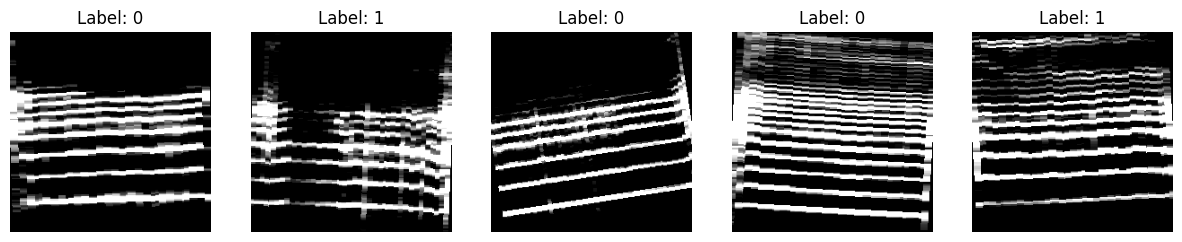

In [ ]:
show_images(train_dataset)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Define train and evaluate function
def train_and_evaluate(model, train_loader, val_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    epochs=10
    for epoch in range(epochs):
        model.train()  # Training mode
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Validation phase
        model.eval()  # Evaluation mode
        val_loss = 0.0
        correct, total = 0, 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Calculate accuracy
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total

        print(f"Epoch {epoch+1}, Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    return avg_val_loss  # Optuna minimizes this loss


In [ ]:
import optuna

def objective(trial):
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)  # Suggests learning rate
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])  # Batch size options

    # Define optimizer
    optimizer = torch.optim.Adam(resnet18.parameters(), lr=lr)

    # Create DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train model and return validation loss
    val_loss = train_and_evaluate(resnet18, train_loader, test_loader)

    return val_loss  # Optuna minimizes this

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

print("Best hyperparameters:", study.best_params)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.0001)

In [ ]:
# Training loop
num_epochs = 10
train_losses = []
validation_losses = []
for epoch in range(num_epochs):
    resnet18.train()
    running_loss=0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    average_train_loss = running_loss / len(train_loader)
    train_losses.append(average_train_loss)


In [ ]:
    # Validation loop
    resnet18.eval()
    validation_loss = 0.0


    with torch.no_grad():
        total_correct = 0
        total_samples = 0

        for images, labels in test_loader:
            outputs = resnet18(images)
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            validation_loss += loss.item()


    average_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(average_validation_loss)

    accuracy = total_correct / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Accuracy: {accuracy:.4f}')

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Training Loss: {average_train_loss:.4f}, '
          f'Validation Loss: {average_validation_loss:.4f}')

Epoch [10/10], Loss: 0.2341, Validation Accuracy: 0.5294
Epoch [10/10], Training Loss: 0.2134, Validation Loss: 0.2341


In [ ]:
resnet18.eval()
with torch.no_grad():
    total_correct = 0
    total_samples = 0

    for images, labels in test_loader:
        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    accuracy = total_correct / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}')

Epoch [10/10], Validation Accuracy: 0.9800


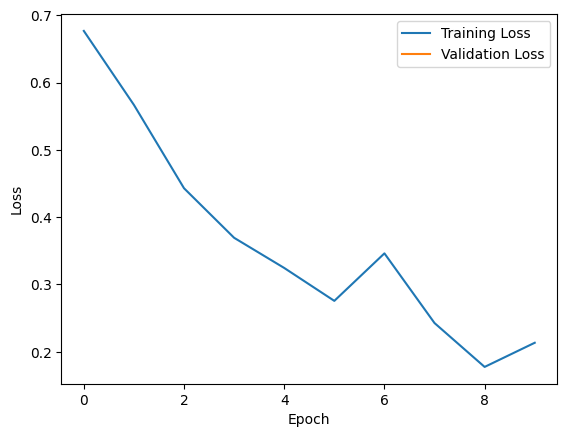

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.numpy())
            all_predictions.extend(predicted.numpy())

    return np.array(all_labels), np.array(all_predictions)

In [ ]:
true_labels, predicted_labels = evaluate_model(resnet18, test_loader)


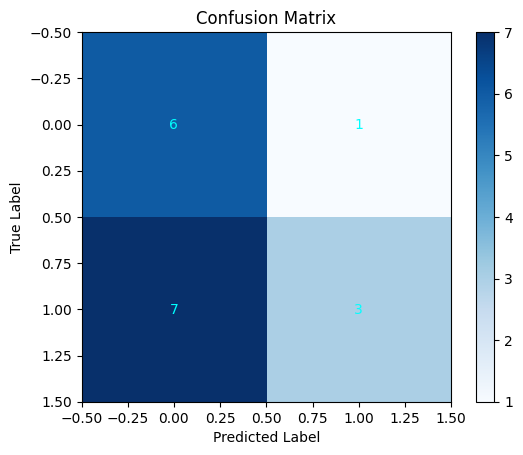

In [ ]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Annotate values in each square
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='cyan')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
accuracy = accuracy_score(true_labels, predicted_labels)
classification_report_str = classification_report(true_labels, predicted_labels)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_str)

Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.62      0.62      0.62         8

    accuracy                           0.62        16
   macro avg       0.62      0.62      0.62        16
weighted avg       0.62      0.62      0.62        16



In [ ]:
summary(resnet18, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Assuming resnet18 is your trained model
# You should load the model and its state_dict before using it for inference

# Load the image and preprocess it
image_path = '/content/mea4-P27.jpg'  # Replace with the path to your image
image = Image.open(image_path).convert('RGB')

# Define the transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.8553, 0.8701, 0.9247], std=[0.1909, 0.1881, 0.1682]),
])

# Preprocess the image
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

# Ensure the model is in evaluation mode
resnet18.eval()

# Perform inference
with torch.no_grad():
    output = resnet18(input_batch)

# Get the predicted class
_, predicted_class = torch.max(output, 1)

# Print the predicted class
print(f'The predicted class for the given image is: {predicted_class.item()}')


The predicted class for the given image is: 1
